In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train 2.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
var_holder = {}

for i in range(1,51):
    var_holder['item' + str(i)] = df[df['item']==i]
    
locals().update(var_holder)

In [5]:
df1 = pd.DataFrame(item1.groupby('date')['sales'].sum())

In [6]:
df1.head()

,sales
date,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149


In [8]:
df1.reset_index(level=0,inplace=True)

In [9]:
df1.head()

,date,sales
0,2013-01-01,133
1,2013-01-02,99
2,2013-01-03,127
3,2013-01-04,145
4,2013-01-05,149


In [6]:
df1['date'] =  pd.to_datetime(df1['date'])

In [8]:
len(df1)

1826

In [10]:
var_holder = {}     #sales sum for next 90 days
 
for i in range(len(df1)):
    if len(df1[i:i+90]) ==90:
        var_holder[df1['date'][i]] = df1['sales'][i:(i+90)].sum()
    
locals().update(var_holder)

In [11]:
df2 = pd.DataFrame.from_dict(var_holder,orient ='index')

In [12]:
df2.head()

,0
2013-01-01,12847
2013-01-02,12848
2013-01-03,12936
2013-01-04,13019
2013-01-05,13103


In [13]:
df2.reset_index(level=0,inplace=True)

In [14]:
df2.columns = ['date','aggregated_sum_for_3months']

In [15]:
df2['year'] = pd.DatetimeIndex(df2['date']).year

In [16]:
df2['month'] = pd.DatetimeIndex(df2['date']).month

In [17]:
df2.head()

,date,aggregated_sum_for_3months,year,month
0,2013-01-01,12847,2013,1
1,2013-01-02,12848,2013,1
2,2013-01-03,12936,2013,1
3,2013-01-04,13019,2013,1
4,2013-01-05,13103,2013,1


In [18]:
df2.shape

(1737, 4)

In [19]:
x = df2.iloc[:1461,2:]         #training data

In [20]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [21]:
x.tail()

,year,month
1456,2016,12
1457,2016,12
1458,2016,12
1459,2016,12
1460,2016,12


In [22]:
y = df2.iloc[:1461,1:2]       #training data

In [23]:
x_test = df2.iloc[1461:,2:]  #test data

In [24]:
y_test = df2.iloc[1461:,1:2]  #test data

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features1 = PolynomialFeatures(degree=2)
x_poly1 = polynomial_features1.fit_transform(x)
x_test_t = polynomial_features1.transform(x_test)
model1 = LinearRegression()
model1.fit(x_poly1, y)
y_poly_pred1 = model1.predict(x_test_t)

In [26]:
y_poly_pred1.shape

(276, 1)

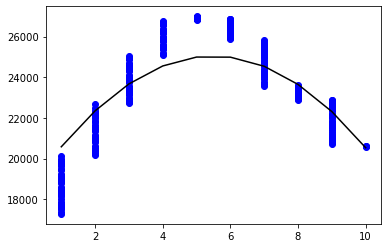

In [27]:
plt.scatter(df2.month[1461:],y_test, color ='b')
plt.plot(df2.month[1461:],y_poly_pred1, color ='k')

plt.show()

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse1 = np.sqrt(mean_squared_error(y_test,y_poly_pred1))
r21 = r2_score(y_test,y_poly_pred1)
print(rmse1)
print(r21)

1320.9387318428587
0.7466976887692298


In [29]:
polynomial_features2 = PolynomialFeatures(degree=3)
x_poly2 = polynomial_features2.fit_transform(x)
x_test_t = polynomial_features2.transform(x_test)
model2 = LinearRegression()
model2.fit(x_poly2, y)
y_poly_pred2 = model2.predict(x_test_t)

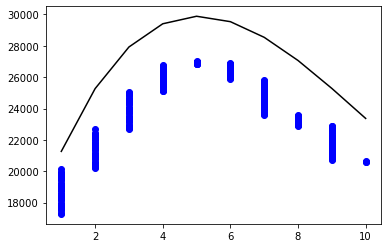

In [30]:
plt.scatter(df2.month[1461:],y_test, color ='b')
plt.plot(df2.month[1461:],y_poly_pred2, color ='k')

plt.show()